## KMEANS案例2-学生学习模式分析
- 使用学生数据集，通过KMEANS算法对学生学习模式聚类，探索最佳类别个数
- 分析不同类别的学习模式特点

## 1. 学生学习模式简介
- 学生行为模式"can be conceptualized as a coherent whole of learning activities that learners usually employ, their beliefs about learning and their learning motivation, a whole that is characteristic of them in a certain period of time."即学习模式是学生在行为、动机等方面的体现。（Vermunt, J. D., & Donche, V. (2017). A learning patterns perspective on student learning in higher education: state of the art and moving forward. Educational psychology review, 29(2), 269-299.）

- 行为数据是最容易被记录和收集的学习数据，学生动机、自我效能等内在状态虽不易收集，但可通过行为来推断。可对学生所有行为模式分析来表示学习模式；

- 方法：使用聚类算法对学生行为数据进行分群，分群后观察各群的行为、成绩基本信息等方面的特点，为各群寻找合适的标签。

## 2. 学生数据集student_data_cluster.csv
使用学生数据集student_data_cluster.csv，包含4607人，其中及格3673，不及格934人

（1）主要行为如下：
- content（学生查看课程资料的次数）：如浏览视频、课件等内容的行为。体现了学生使用studying，rehearsing,repeating策略的程度；
- assessment（学生参加测验的次数）：如课后练习、单元测试。可反应学生的self-evaluation（自我评估），reflection（反思）和self-efficacy（自我效能）；
- check_grade（查看成绩次数）：查看作业分数、测验分数。可反应学生的motivation（动机)和self-confidence（自我信心）；
- interaction（交互次数）：如论坛讨论即时消息。可反应学生使用help-seeking（寻求帮助）策略的能力；
- others(其它行为)：如查看消息，访问外部链接，登录记录等。与上述行为一起构成学生完整的行为记录。

（2）其它字段：
- grade 分数，浮点型数据
- isPass 是否通过考试，1-未通过；0-通过
- totalRecoed 总学习次数，为上述五个行为之和，反应学生的总体参与度，不作为输入变量

## 3. 学生学习模式聚类
使用聚类算法可实现学生分群，本案例使用K-means算法

### 3.1 使用手肘法确定最佳群个数

- (1)加载学生数据集

In [1]:
from sklearn.cluster import KMeans#KMEANS算法实现包
 
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize#数据正则化

data = pd.read_csv('student_data_cluster.csv')#读取数据文件
feature = data.iloc[:,5:]#只取5个行为变量作为聚类算法的输入
feature.head(20)

content  assessment  check_grade  interaction  others
0        62          24            1           39       0
1       618         235          135          410       0
2       628         175          103          142       0
3       350        1075          119          322       0
4       627         180          176          260       0
5       290         149          133          164       0
6        51          21            9           52       0
7       207         608           69          161       0
8       451         200           24          167       0
9       489         136           69          195       0
10      402          93           52          156       0
11      373         149          104          215       0
12      344         337          100          254       0
13      423         189          110          220       0
14      104         201           94          264       0
15      211         161           72          137       0
16      271         130           75          179       0
17      272         837           77          350       0
18      675         948           59         1341       0
19      351         474           44          343       0

(2)对数据进行正则化（标准化）
- 去除量纲的影响，将有量纲的数值变成无量纲的纯数值；
- 解决各特征之间数值差异过大的问题，比如一个向量（uv:10000, rate:0.03,money: 20)，如果要与其它向量一起计算欧氏距离或者余弦相似度时，会向uv倾斜非常严重，导致其余2个特征对模型的贡献度非常低
- 提升训练的速度，防止过拟合

  常用的正则化（标准化）方法如下
- Z-score标准化(preprocessing.StandardScaler())是将数据变成均值为0，标准差为1的分布，此方法比较适合于本身较符合正态分布的数据集。
- 最大最小归一化(preprocessing.MinMaxScaler())，用数值除以最大最小值之差
- 正则化(preprocessing.Normalizer()):① L1正则化：将每一个样本的各向量绝对值之和作为范数，再用每个向量去除了这个范数，就得到这个样本L1正则化后的向量:② L2正则化：将每一个样本的向量先平方和再开方作为范数，再相除

In [2]:
feature_Norm = normalize(feature, norm = 'l2') # 使用L2正则化
feature_Norm = pd.DataFrame(feature_Norm) # 将归一化后的特征数组转换为Pandas DataFrame，可以更方便地进行后续的数据操作和分析。
feature_Norm.head(20)

0         1         2         3    4
0   0.804314  0.311347  0.012973  0.505939  0.0
1   0.782671  0.297618  0.170972  0.519248  0.0
2   0.930210  0.259215  0.152566  0.210334  0.0
3   0.296231  0.909851  0.100718  0.272532  0.0
4   0.866081  0.248636  0.243110  0.359140  0.0
5   0.746575  0.383585  0.342395  0.422201  0.0
6   0.668110  0.275104  0.117902  0.681210  0.0
7   0.310937  0.913285  0.103646  0.241840  0.0
8   0.864966  0.383577  0.046029  0.320287  0.0
9   0.892189  0.248134  0.125892  0.355781  0.0
10  0.905045  0.209376  0.117071  0.351212  0.0
11  0.798199  0.318852  0.222554  0.460088  0.0
12  0.621440  0.608794  0.180651  0.458854  0.0
13  0.806409  0.360311  0.209705  0.419409  0.0
14  0.288723  0.558013  0.260961  0.732912  0.0
15  0.686765  0.524024  0.234346  0.445909  0.0
16  0.757447  0.363351  0.209626  0.500307  0.0
17  0.286239  0.880817  0.081031  0.368323  0.0
18  0.379952  0.533622  0.033211  0.754838  0.0
19  0.513374  0.693274  0.064355  0.501673  0.0

(3) 使用手肘法确定最佳K值
- 当每个簇到质心的距离之和不再变化时，即为最佳K值。若画出距离随着K值变化的曲线，可看到曲线为手肘形状（由高变低的曲线），在转折处的K值为距离由大变小的转折点，即为最佳值;
- 用clf.inertia_可得到每个簇到其质心的距离之和。各个簇的inertia相加的和越小，即簇内越相似。（但是k越大inertia越小，追求k越大对应用无益处）

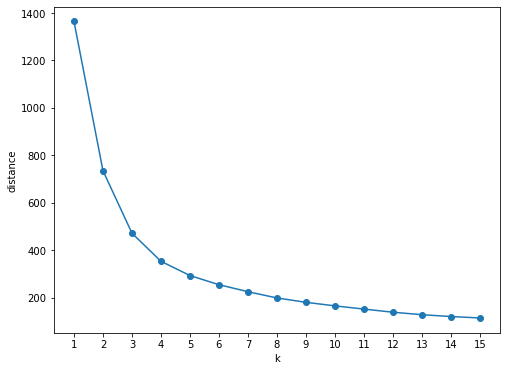

In [3]:
distortions = []
#用来评估簇的个数是否合适，距离越小说明簇分的越好，选取临界点的簇个数
plt.figure(figsize=(8,6))
for i in range(1,16,1): #这里列出群个数为1到16时的K值与质心距离
    clf = KMeans(n_clusters=i)
    s = clf.fit(feature_Norm)
    distortions.append(clf.inertia_)
k = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.scatter(k, distortions)
plt.plot(k, distortions)
plt.xlabel("k")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])  # 指定x轴刻度的数目与取值
plt.ylabel("distance")
plt.show()

由上图可看出，K取3或4时比较合适，那究竟取K=3还是4呢？

###   3.2根据K值进行聚类分群
（1） 根据K值分群
- 先考虑K=3 的情况，看分出来的群特征是否明显

In [4]:
#调用kmeans类
clf = KMeans(n_clusters=3) #设置分成3群
y_pred = clf.fit_predict(feature_Norm)#填入变量，得到分群结果，即每个样本得到一个群号
df_cluster = pd.DataFrame(y_pred,columns=['cluster'])
df_cluster.head(20)

cluster
0         0
1         0
2         0
3         2
4         0
5         0
6         0
7         2
8         0
9         0
10        0
11        0
12        0
13        0
14        2
15        0
16        0
17        2
18        2
19        2

(2) 输出聚类结果
- clf.cluster_centers_可输出质心样本的输入变量
- 用pd.concat将原始数据样本和每个样本的群号联结起来，合并数据

In [5]:
print(clf.cluster_centers_) #输出质心
output = pd.concat([data,df_cluster],axis=1)#合并原始数据和群号，为方便分析，把每个样本的标签和原始数据对应起来
 
output.to_excel('cluster3.xlsx')
output = pd.DataFrame(output)
output.tail(20)#打印最后20条数据


[[0.77039489 0.34853969 0.10724626 0.40600289 0.03208335]
 [0.12021164 0.08725488 0.2550608  0.90166707 0.04617273]
 [0.40859336 0.79316745 0.09487632 0.31393774 0.01185644]]


id  userID  grade  isPass  totalRecord  content  assessment  \
4587  7875    5588   0.00       1           45        1           1   
4588  7878    5589  14.64       1           59        4          39   
4589  7880    5590  34.50       1         1168      327         717   
4590  7895    5591  42.83       1           26       12           5   
4591  7904    5592   0.00       1           54       32           0   
4592  7906    5593  24.72       1          648      299         183   
4593  7907    5594  14.94       1          296       69         179   
4594  7908    5595  25.53       1          929      202         561   
4595  7917    5596  39.62       1          136       40          19   
4596  7918    5597  16.34       1          302      121          81   
4597  7926    5598   4.40       1          111       30          68   
4598  7928    5599  15.45       1          287       67          15   
4599  7938    5600  51.50       1          175        0           1   
4600  7939    5601  32.00       1          367      108          73   
4601  7956    5602   2.08       1            2        0           2   
4602  7958    5603  33.14       1          106       65          28   
4603  7961    5604  11.49       1            3        3           0   
4604  7962    5605   0.11       1           64       48          11   
4605  7963    5606   2.08       1            5        0           0   
4606  7964    5607  46.06       1           22        1           0   

      check_grade  interaction  others  cluster  
4587            4           39       0        1  
4588            0           16       0        2  
4589           31           93       0        2  
4590            1            8       0        0  
4591            5           17       0        0  
4592           49          117       0        0  
4593            4           44       0        2  
4594           36          130       0        2  
4595           10           67       0        1  
4596           25           75       0        0  
4597            6            7       0        2  
4598            2          137      66        1  
4599           38          136       0        1  
4600           48          137       1        0  
4601            0            0       0        2  
4602            0           13       0        0  
4603            0            0       0        0  
4604            0            5       0        0  
4605            0            5       0        1  
4606            3           18       0        1

## 3.3  分析各群的学习模式，确定群标签

将各群的数据分开，单独求得各变量的平均值，可观察各群的特点，为各群确定标签

![jupyter](average.png)

上图中，黄色填充为该列最大值，红色字体为该列最小值。isPass中的值为挂科人数占该群比例
对各群学习模式总结如下：

1. check_grade和others所占比例小，不作讨论；
2. cluster 0 有最高的assessment（参与测验和评估）次数，因此，cluster 0 称为偏向评估群（assessment prefered）
3. cluster 1 有最高的content（访问课程资源）次数，因此cluster 1 称为偏向资源访问群（resource prefered）
4. cluster 2 有最高的interaction（参与交互）次数，因此，cluster 2称为偏向交互群（interaction prefered）

可进一部分分析各群的特点：
- 偏向评估群（cluster 0）- 最高的平均分和最低的挂科率，最高的总学习次数（totalRecoed），最高的参与评估次数。说明高参与度和高测验次数可以有更好的学习表现。
- 偏向资源访问群（cluster 1）- 最高的资源访问次数（content）,和中等的通过率。与cluster 1相比，可说明高资源访问不如高的测验次数学习表现好；
- 偏向交互群（cluster 2）- 最高的交互次数（interaction），最低的平均分，与前2群相比，可说明交互对学习表现的贡献低于其他行为

### 作业：
根据上述结果，尝试K=4的情况，使用K均值算法对上述学生数据进行分群，分析学生的学习模式标签和特点。